## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','preprocessing_clustering.R'))
# install_all_packages()
load_library_packages()

## Clustering - Kmodes Silhoette

In [3]:
df_during_barriers_dist <- distinct(df_during_barriers)
nrow(df_during_barriers_dist)

[1] 33

### Silhoette 
<hr />

In [4]:
df_matrix <- data.matrix(df_during_barriers_dist) - 1
similarity_matrix <- df_matrix %*% t(df_matrix) + ((!df_matrix) + 0) %*% ((!t(df_matrix)) + 0)
dissimilarity_matrix <- ncol(df_during_barriers_dist) - similarity_matrix
head(dissimilarity_matrix)

0,1,2,1,1,2,2,2,2,3,...,2,3,4,4,1,4,3,3,3,5
1,0,3,2,2,3,3,1,3,2,...,3,4,3,3,2,5,4,2,2,4
2,3,0,3,3,2,2,4,4,3,...,2,3,2,4,1,2,3,5,3,3
1,2,3,0,2,1,1,1,1,2,...,3,2,3,3,2,3,4,2,4,4
1,2,3,2,0,3,3,3,1,4,...,3,4,5,5,2,3,2,2,4,4
2,3,2,1,3,0,2,2,2,1,...,2,1,2,2,1,2,3,3,3,3


#### Scanning parameters


In [5]:
nseed <- 1000
nk <- nrow(distinct(df_during_barriers))
# ks_by_seed <- data.frame(matrix(NA, nrow = nseed, ncol = nk-1))
# for (seed in 1:nseed) {
#     silhouette_scs <- c()
#     for (k in 2:nk) {
#         sc <- silhouette_values_kmodes(
#             num_clusters = k,
#             df = df_during_barriers_dist,
#             diss_matrix = dissimilarity_matrix,
#             iters = 200,
#             s = seed)[[1]]

#         silhouette_scs <- append(silhouette_scs, sc)
#     }

#     ks_by_seed[seed, ] <- silhouette_scs
# }

# write.csv(
#     ks_by_seed,
#     "silhouette_kmodes_barriers.csv", row.names = FALSE
# )

#### Results

In [6]:
scs <- read.csv("silhouette_kmodes_barriers.csv")
scs[, ncol(scs)+1] <-  seq.int(nrow(scs))
colnames(scs) <- append(2:nrow(distinct(df_during_barriers)), "seed")
head(scs)

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,seed
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0.2881323,0.2665527,0.3439010,0.3234731,0.2598644,0.2622731,0.3022880,0.3467709,0.3451242,0.3287365,...,0.07575758,0.06060606,0.11085859,0.11515152,0.06060606,0.04545455,0.03030303,0.01515152,0,1
2,0.1618269,0.2229722,0.2944947,0.2539509,0.3555802,0.3244430,0.2319111,0.2256046,0.2781298,0.2671375,...,0.10101010,0.08080808,0.07575758,0.07575758,0.06060606,0.04545455,0.03030303,0.01515152,0,2
3,0.1962519,0.2000461,0.3142417,0.1911691,0.2510887,0.3602603,0.3275163,0.2733918,0.2340142,0.1997584,...,0.11085859,0.09570707,0.09570707,0.04545455,0.03030303,0.03030303,0.03030303,0.01515152,0,3
4,0.1850108,0.1619804,0.2151636,0.3139007,0.3307145,0.3642887,0.2866069,0.2470239,0.2869228,0.2821110,...,0.14545455,0.10404040,0.10404040,0.07575758,0.06060606,0.04545455,0.03030303,0.01515152,0,4
5,0.1860313,0.3223982,0.3547553,0.2991001,0.3337294,0.2834828,0.2115434,0.2516087,0.2488353,0.2627591,...,0.08888889,0.06060606,0.07575758,0.07575758,0.06060606,0.04545455,0.03030303,0.01515152,0,5
6,0.2032734,0.2619444,0.3158120,0.2545863,0.1586734,0.2000767,0.2000767,0.2002438,0.2337434,0.2382888,...,0.16818182,0.16818182,0.12676768,0.11161616,0.06060606,0.04545455,0.03030303,0.01515152,0,6


####  Best K and best seed by highest sample mean

In [7]:
print("Best K")
best_K_kmodes <- match(max(apply(scs, 2, mean)[1:ncol(scs)-1]), apply(scs, 2, mean)) + 1
print(best_K_kmodes)
print("Best Seed")
best_seed_kmodes <- match(max(scs[, best_K_kmodes-1]), scs[, best_K_kmodes-1])
print(best_seed_kmodes)
print("Silhouette")
print(scs[best_seed_kmodes, best_K_kmodes-1])

[1] "Best K"
[1] 8
[1] "Best Seed"
[1] 911
[1] "Silhouette"
[1] 0.4432984


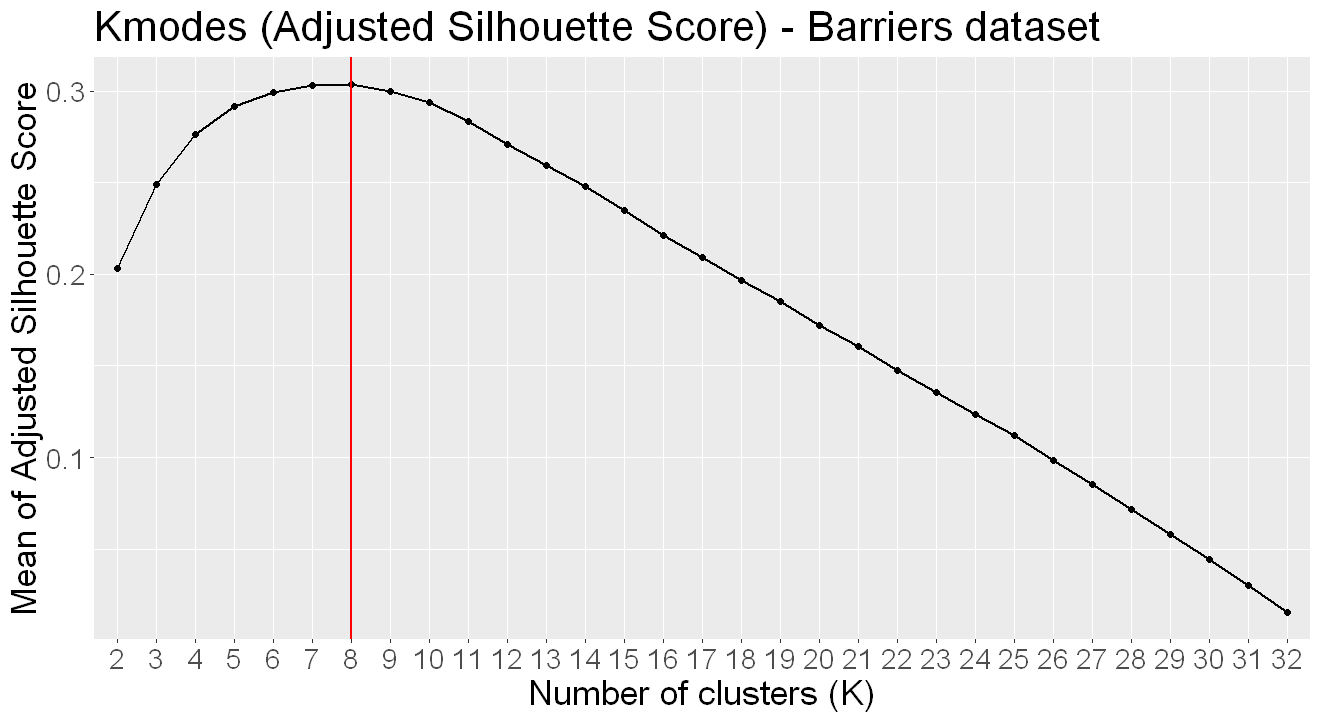

In [8]:

means_df <- data.frame(mean = apply(scs, 2, mean)[1:(nk-2)], k = names(apply(scs, 2, mean)[1:(nk-2)]))
options(repr.plot.width = 11, repr.plot.height =6)
ggplot(data=means_df, aes(x=factor(as.numeric(k)), y=mean, group=1)) +
    geom_line(size=0.7) + geom_point(size=1.5) + 
    geom_vline(xintercept = best_K_kmodes-1, color = "red", size=0.8) + 
    ggtitle("Kmodes (Adjusted Silhouette Score) - Barriers dataset") +
    xlab('Number of clusters (K)') +
    ylab('Mean of Adjusted Silhouette Score')+ 
    theme(text = element_text(size = 21)) 


ggsave(path="graphs", file="metric_evolution_barriers_KS.jpeg", width = 11, height = 6)

#### Evaluating the silhuette coefficient for best seed

In [9]:
silhoutte_result <-  silhouette_values_kmodes(num_clusters=best_K_kmodes, df=df_during_barriers_dist, diss_matrix=dissimilarity_matrix, iters=200, s=best_seed_kmodes)

In [10]:
silhoutte_result <-  silhouette_values_kmodes(num_clusters=8, df=df_during_barriers_dist, diss_matrix=dissimilarity_matrix, iters=200, s=911)
coef_data <- data.frame(coef=silhoutte_result[[2]], clust=silhoutte_result[[3]]$cluster)
coef_data <- coef_data[order(coef_data$coef, decreasing=TRUE), ]
coef_data <- coef_data[order(coef_data$clust, decreasing=TRUE), ]
coef_data$clust <- as.factor(coef_data$clust )
coef_data$ID <- seq.int(nrow(coef_data))


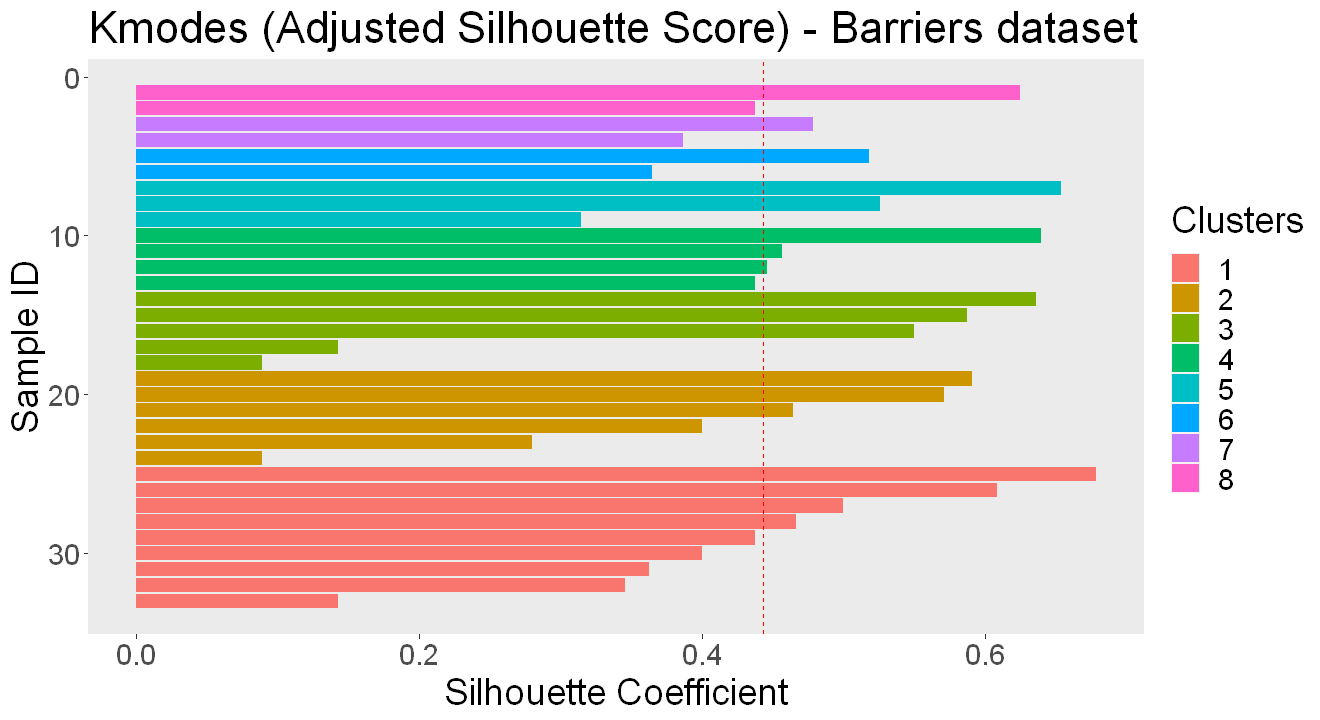

In [11]:
options(repr.plot.width = 11, repr.plot.height =6)
ggplot(data = coef_data, aes(y=coef, x=ID, fill=clust)) + 
  geom_bar(stat = "identity") + 
  geom_hline(yintercept=mean(coef_data$coef), linetype="dashed", color = "red") + 
  coord_flip() + 
  scale_x_reverse() + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) +
  ggtitle("Kmodes (Adjusted Silhouette Score) - Barriers dataset") +
  xlab("Sample ID") +
  ylab("Silhouette Coefficient") + 
  scale_fill_discrete(name = "Clusters") + 
  theme(text = element_text(size = 22)) 

ggsave(path="graphs", file="coefficients_KS.jpeg", width = 11, height = 5)

## Exploring Kmodes best k

In [10]:
chosen_kmode = kmodes_seed(df_during_barriers_dist, best_K_kmodes, max_iter=200, seed=best_seed_kmodes)
df_during_barriers_dist$cluster <- chosen_kmode$cluster
head(df_during_barriers_dist)

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard,cluster
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,1,0,0,0,0,0,3
2,1,0,1,0,0,0,3
3,0,0,0,0,1,0,1
4,1,0,0,0,0,1,3
5,1,1,0,0,0,0,2
6,0,0,0,0,0,1,1


In [11]:
joint <- c(
    'PA_barrier_places_closed_dangerous'='PA_barrier_places_closed_dangerous',
    'PA_barrier_money' = 'PA_barrier_money',
    'PA_barrier_no_interest'='PA_barrier_no_interest',
    'PA_barrier_percieve'='PA_barrier_percieve',
    'PA_barrier_time' = 'PA_barrier_time',
    'PA_barrier_hard' = 'PA_barrier_hard'
)

df_during_barriers <- left_join(df_during_barriers, df_during_barriers_dist, by = joint)
df_during$cluster <- df_during_barriers$cluster
df_during_facilitators$cluster <- df_during_barriers$cluster

nrow(df_during_barriers)

[1] 1214

In [12]:
table(df_during$cluster)


  1   2   3   4   5   6   7   8 
356  63 450  40  11   5  10 279 

### Profile Plots
<hr />

In [ ]:
colors <- c('deepskyblue4', 'darkgreen', 'chocolate1', 'blueviolet', 'firebrick4', 'deeppink3', 'darkslategray', "grey")
create_cluster_histograms(
    colors = colors, 
    df = df_during, 
    names = names(df_during[, 20:ncol(df_during)-1]),
    best_k = best_K_kmodes
)
create_cluster_histograms(
    colors = colors, 
    df = df_during_facilitators, 
    names = names(df_during_facilitators[, 1:ncol(df_during_facilitators)-1]),
    best_k = best_K_kmodes
)

#### Modas

In [ ]:
chosen_kmode$modes

,PA_barrier_places_closed_dangerous,PA_barrier_money,PA_barrier_no_interest,PA_barrier_percieve,PA_barrier_time,PA_barrier_hard
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
5,0,0,1,0,1,1
6,1,0,1,0,1,0
7,1,1,0,0,1,0
8,0,0,0,1,0,0
